<a href="https://colab.research.google.com/github/ncphung1405/bai1/blob/main/Ph%C3%A2n_t%C3%ADch_doanh_s%E1%BB%91_nh%C3%A0_h%C3%A0ng_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# 1. Doanh thu của nhà hàng 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns
import wordcloud

In [ ]:
data = pd.read_csv("hung.csv")
data.dtypes

In [ ]:
data.head()

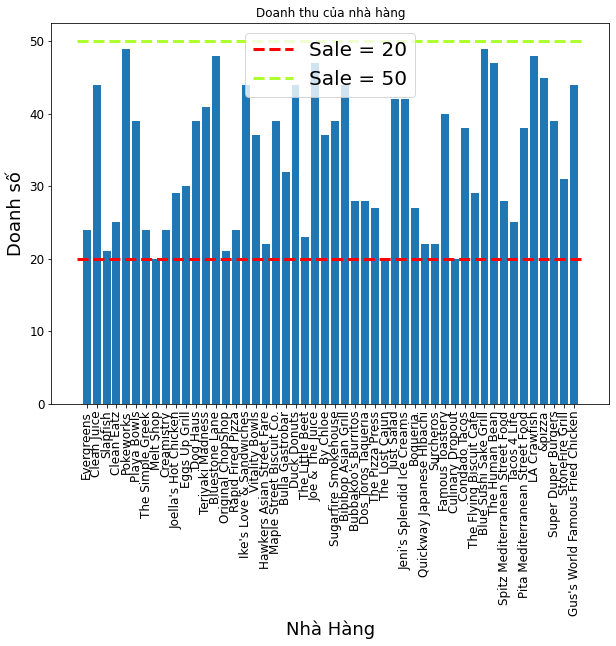

In [5]:
plt.figure(figsize=(10, 7))
plt.bar(data.loc[:, "Restaurant"], data.loc[:, "Sales"])
plt.xlabel("Nhà Hàng"
          ,fontsize=18)
plt.ylabel("Doanh số"
          ,fontsize=18)
plt.xticks(rotation="vertical"
         ,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Doanh thu của nhà hàng")

plt.hlines(20, -1, 50, color="r", linestyles="--", linewidth=3, label="Sale = 20")
plt.hlines(50, -1, 50, color="greenyellow", linestyles="--", linewidth=3, label="Sale = 50")
plt.legend(loc="upper center"
          ,fontsize=20)

plt.show()

Từ hình trên, chúng ta có thể thấy rằng doanh thu của tất cả các nhà hàng từ 20 đến 50.

# 2. Làm sạch dữ liệu


In [ ]:
# "YOY_Sales"、"YOY_Units": object -> float
data.loc[:, "New_YOY_Sales"] = data.loc[:, "YOY_Sales"].map(lambda x: x.split("%")[0]).astype(float)
data.loc[:, "New_YOY_Units"] = data.loc[:, "YOY_Units"].map(lambda x: x.split("%")[0]).astype(float)

# "Location" -> "Region" + "City"
data.loc[:, "City"] = data.loc[:, "Location"].map(lambda x: x.split(",")[0])
data.loc[:, "Region"] = data.loc[:, "Location"].map(lambda x: x.split(",")[1])

In [ ]:
data.loc[:, "Region"].unique()

array([' Wash.', ' N.C.', ' Calif.', '  N.J.', ' Pa.', ' N.Y.',
       '  Calif.', ' Ky.', ' S.C.', ' Colo.', ' Texas', ' Ohio', ' Fla.',
       ' Mo.', ' N.J.', ' Va.', ' Ga.', ' Ariz.', ' Neb.', ' Ore.',
       ' Ark.', ' D.C.', ' Tenn.'], dtype=object)

In [ ]:
# Remove the spaces in string in data.loc[:, "Region"]
data.loc[:, "Region"] = data.loc[:, "Region"].map(lambda x: x.strip())
data.loc[:, "Region"].unique()

array(['Wash.', 'N.C.', 'Calif.', 'N.J.', 'Pa.', 'N.Y.', 'Ky.', 'S.C.',
       'Colo.', 'Texas', 'Ohio', 'Fla.', 'Mo.', 'Va.', 'Ga.', 'Ariz.',
       'Neb.', 'Ore.', 'Ark.', 'D.C.', 'Tenn.'], dtype=object)


Do Covid-19, hầu hết YOY_Sales của nhà hàng đều dưới 40%

# 4.Doanh số bán hàng của mỗi khu vực

In [ ]:
region_ = data.groupby(["Region"]).sum()
region_.reset_index(inplace=True)
region_.head()

,Region,Rank,Sales,Units,Unit_Volume,New_YOY_Sales,New_YOY_Units
0,Ariz.,38,20,7,3120,20.8,16.7
1,Ark.,44,25,16,1620,18.4,6.7
2,Calif.,234,339,396,14490,365.7,326.4
3,Colo.,13,41,63,890,34.1,65.8
4,D.C.,47,45,35,1350,17.1,9.4


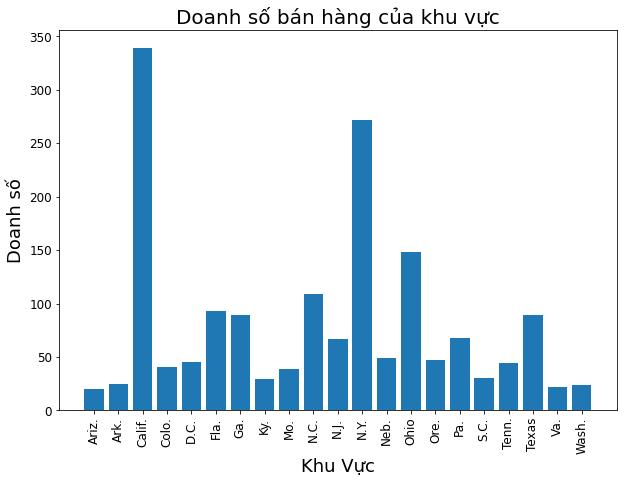

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(region_.loc[:, "Region"], region_.loc[:, "Sales"])

plt.xlabel("Khu Vực"
          ,fontsize=18)
plt.ylabel("Doanh số"
          ,fontsize=18)
plt.xticks(rotation="vertical"
          ,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Doanh số bán hàng của khu vực"
         ,fontsize=20)

plt.show()

In [ ]:
# Để đếm số lượng nhà hàng ở mọi khu vực
region__ = data.groupby("Region")["Restaurant"].count()
region__ = pd.DataFrame(region__)

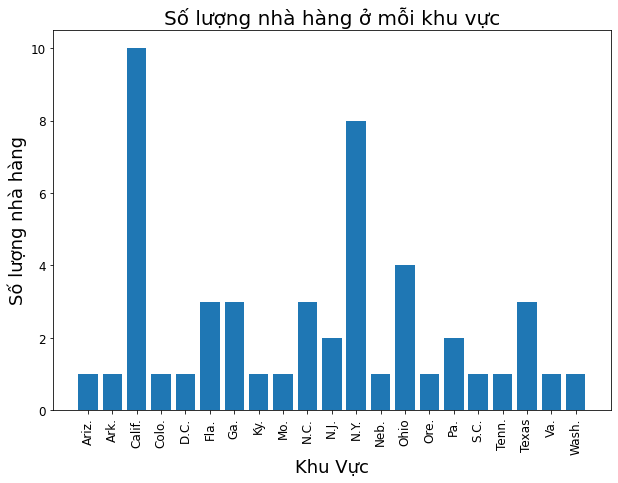

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(region__.index, region__.loc[:, "Restaurant"])
plt.xlabel("Khu Vực"
          ,fontsize=18)
plt.ylabel("Số lượng nhà hàng"
          ,fontsize=18)
plt.xticks(rotation="vertical"
           ,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Số lượng nhà hàng ở mỗi khu vực"
         ,fontsize=20)

plt.show()

Vì vậy, chúng ta có thể thấy rằng có 10 nhà hàng ở California, chỉ có 4 nhà hàng ở Ohio. Đây là lý do tại sao Doanh số bán hàng ở California là cao nhất.